# Przygotowanie środowiska

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

/
Mounted at /content/gdrive
'Biwak miejsca.gmap'   data_for_train	       'Google Earth'   Passwords.kdbx
'Colab Notebooks'     'Forgotten places.gmap'  'My Drive'


In [2]:
!cp /mydrive/data_for_train/feature_opencv.zip ./
!unzip ../feature_opencv.zip -d content/
%cd content/

Archive:  ../feature_opencv.zip
  inflating: content/feature_opencv/bandana.jpg  
  inflating: content/feature_opencv/bandana_in_scene.jpg  
  inflating: content/feature_opencv/fly.png  
  inflating: content/feature_opencv/piano.jpg  
  inflating: content/feature_opencv/poster.jpg  
/content


In [5]:
!pip install opencv-python==3.4.2.16

     |████████████████████████████████| 25.0MB 2.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [6]:
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 161kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Harris Corner Detector

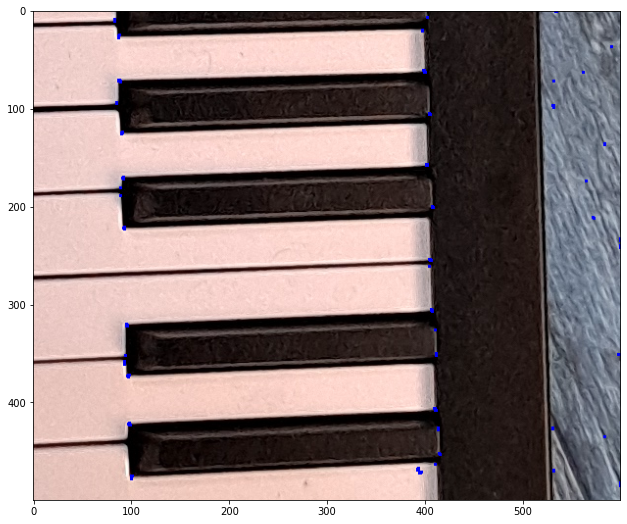

In [10]:
img = cv2.imread('./feature_opencv/piano.jpg')
img = img[2000:2500,1400:2000,:]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.figure(figsize=(16,9))
plt.imshow(img)

# Corner with SubPixel Accuracy

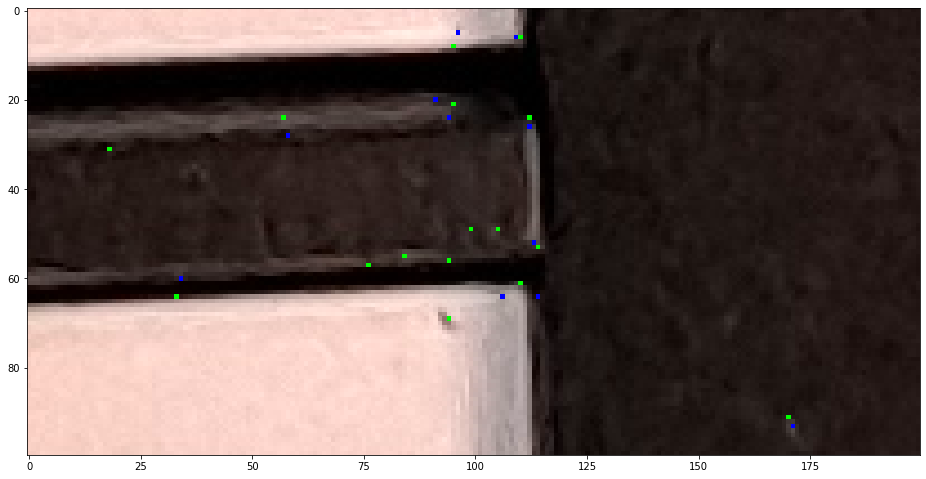

In [13]:
img = cv2.imread('./feature_opencv/piano.jpg')
img = img[2000:2500,1400:2000,:]
img = img[400:,300:500,:]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
plt.figure(figsize=(16,9))
plt.imshow(img)

# Shi-Tomasi Corner Detector & Good Features to Track

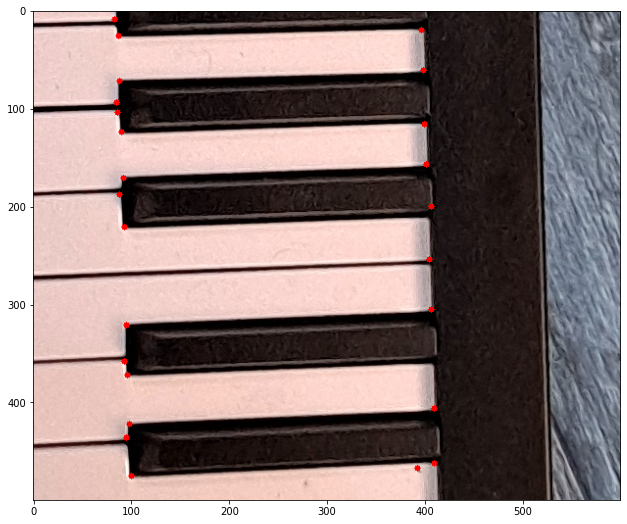

In [15]:
img = cv2.imread('./feature_opencv/piano.jpg')
img = img[2000:2500,1400:2000,:]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.figure(figsize=(16,9))
plt.imshow(img)

# SIFT

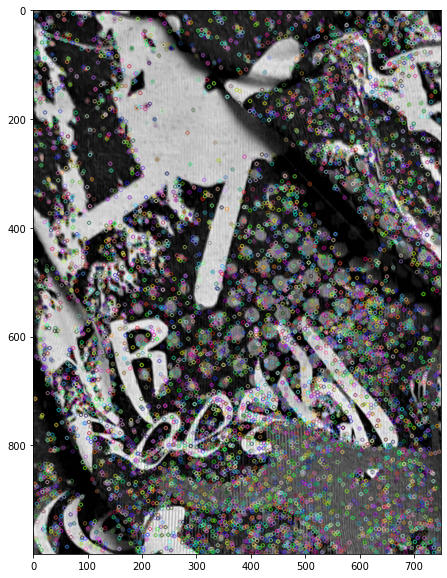

In [23]:
img = cv2.imread('./feature_opencv/bandana.jpg')
img = img[1000:2000,1000:1750,:]
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img_1=cv2.drawKeypoints(gray.copy(),kp,img)
plt.figure(figsize=(20,10))
plt.imshow(img_1)

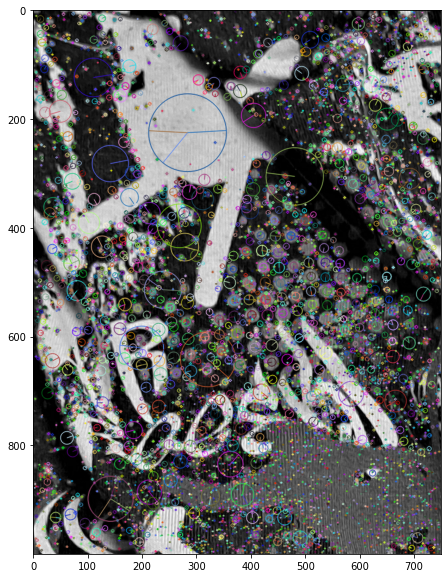

In [24]:
img_2=cv2.drawKeypoints(gray.copy(),kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(20,10))
plt.imshow(img_2)

# SURF

846
400.0
43


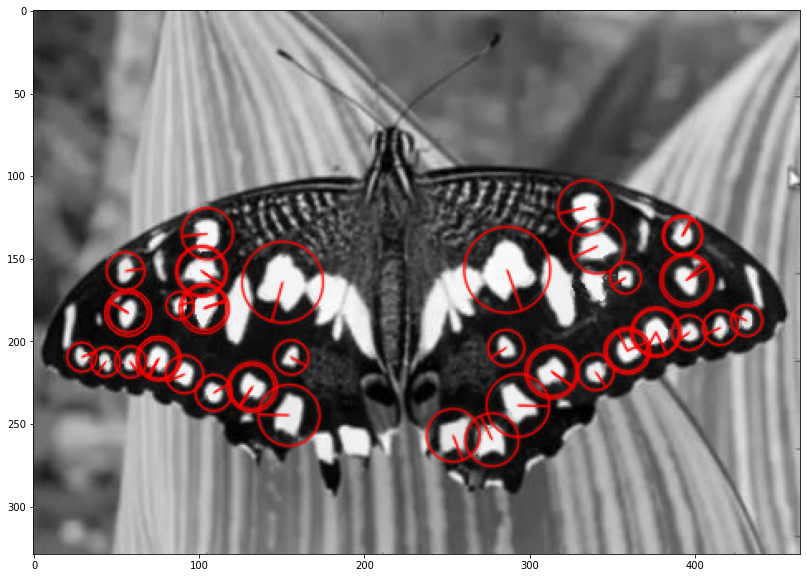

In [5]:
img = cv2.imread('./feature_opencv/fly.png',0)
surf = cv2.xfeatures2d.SURF_create(400)
kp, des = surf.detectAndCompute(img,None)
print(len(kp))
print(surf.getHessianThreshold())
surf.setHessianThreshold(50000)
kp, des = surf.detectAndCompute(img,None)
print(len(kp))
img_1 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
plt.figure(figsize=(20,10))
plt.imshow(img_1)

False


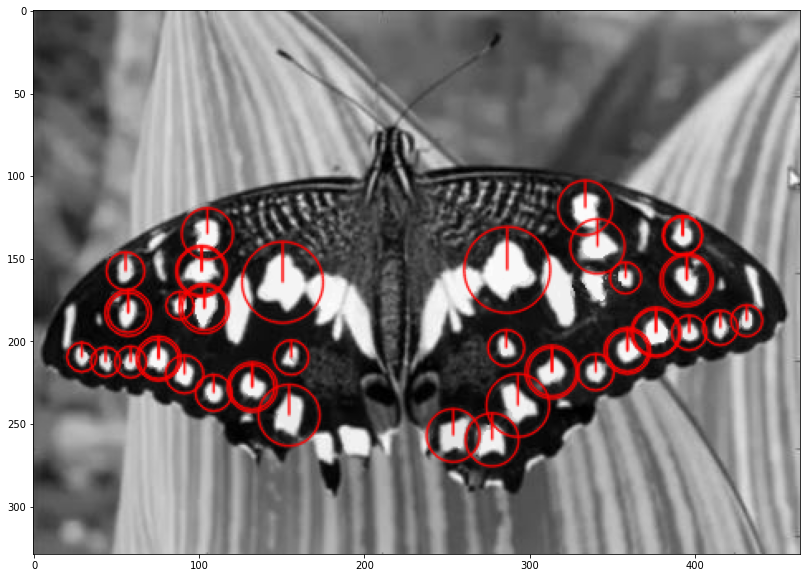

In [6]:
print( surf.getUpright() )
surf.setUpright(True)
kp = surf.detect(img,None)
img_2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
plt.figure(figsize=(20,10))
plt.imshow(img_2)

In [7]:
print( surf.descriptorSize() )
surf.getExtended()
surf.setExtended(True)
kp, des = surf.detectAndCompute(img,None)
print( surf.descriptorSize() )
print( des.shape )

64
128
(43, 128)


# FAST Algorithm for Corner Detection

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 4317
Total Keypoints without nonmaxSuppression: 12371


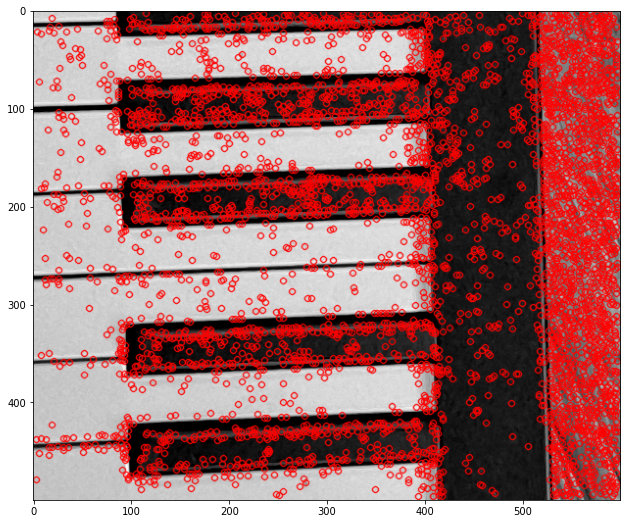

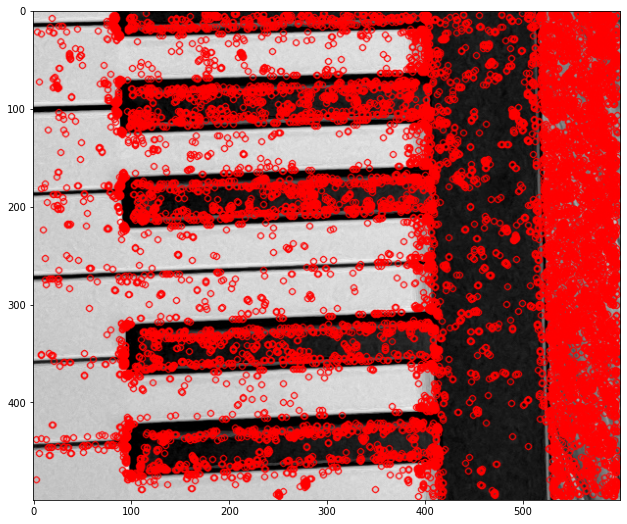

In [29]:
img = cv2.imread('./feature_opencv/piano.jpg', 0)
img = img[2000:2500,1400:2000]
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print("Threshold: {}".format(fast.getThreshold()))
print("nonmaxSuppression:{}".format(fast.getNonmaxSuppression()))
print("neighborhood: {}".format(fast.getType()))
print("Total Keypoints with nonmaxSuppression: {}".format(len(kp)))
plt.figure(figsize=(16,9))
plt.imshow(img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
plt.figure(figsize=(16,9))
plt.imshow(img3)

# BRIEF

In [31]:
img = cv2.imread('./feature_opencv/piano.jpg', 0)
img = img[2000:2500,1400:2000]
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )

32
(67, 32)


# ORB

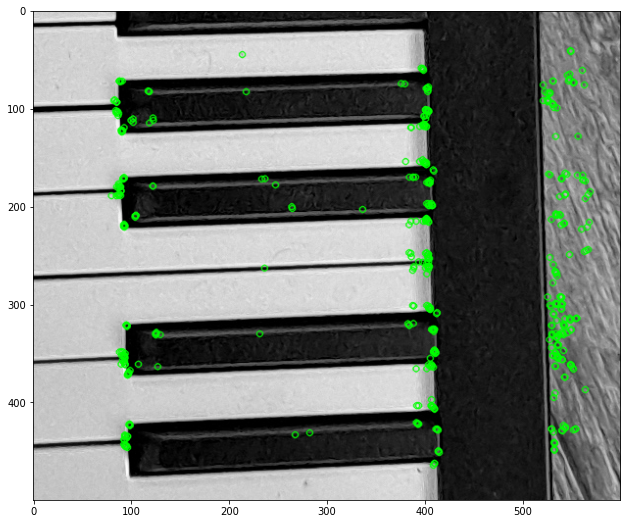

In [32]:
img = cv2.imread('./feature_opencv/piano.jpg', 0)
img = img[2000:2500,1400:2000]
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.figure(figsize=(16,9))
plt.imshow(img2)

# Feature Matching

In [40]:
img1 = cv2.imread('./feature_opencv/bandana.jpg',cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread('./feature_opencv/bandana_in_scene.jpg',cv2.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

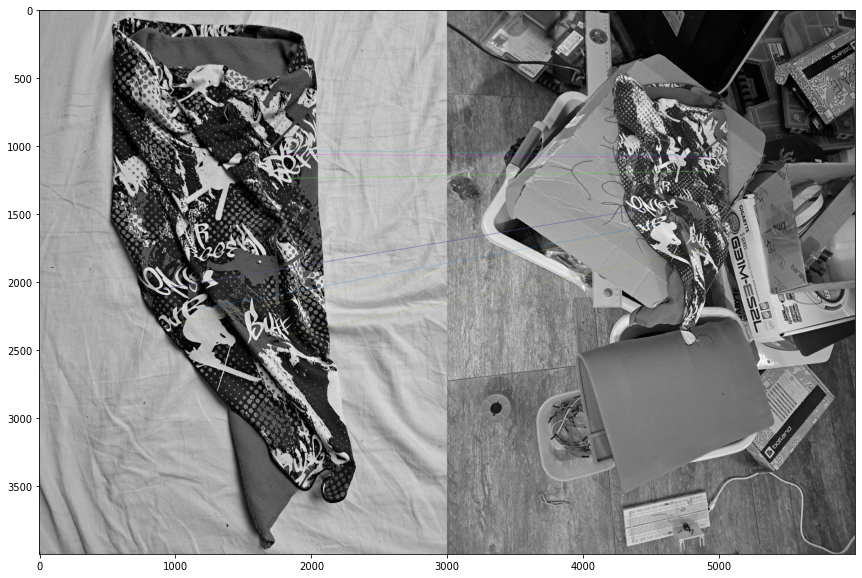

In [42]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,10))
plt.imshow(img3)

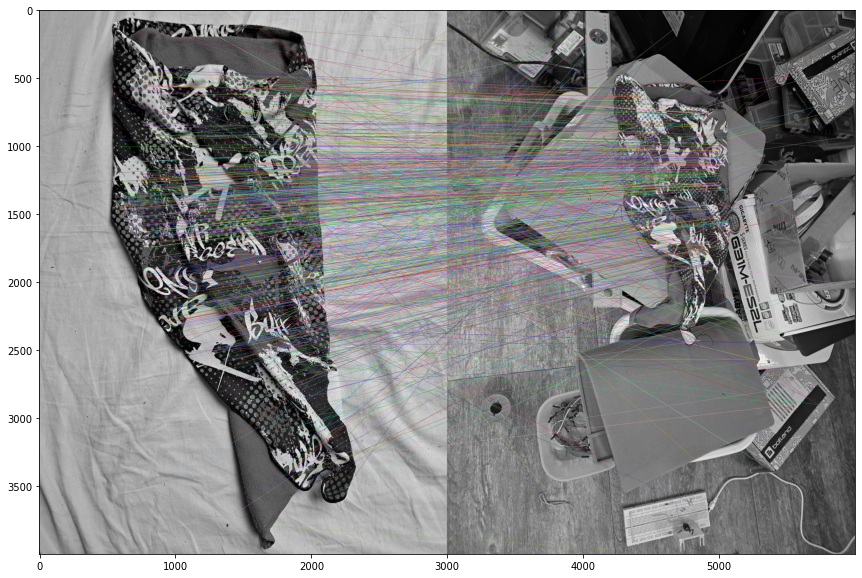

In [44]:
img1 = cv2.imread('./feature_opencv/bandana.jpg',cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread('./feature_opencv/bandana_in_scene.jpg',cv2.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,10))
plt.imshow(img3)

In [45]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

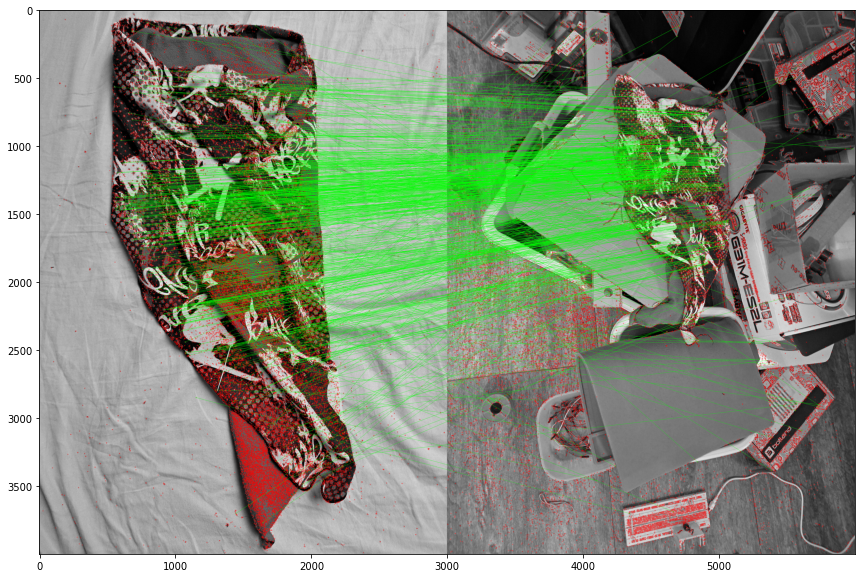

In [47]:
img1 = cv2.imread('./feature_opencv/bandana.jpg',cv2.IMREAD_GRAYSCALE)          # queryImage
img2 = cv2.imread('./feature_opencv/bandana_in_scene.jpg',cv2.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.figure(figsize=(20,10))
plt.imshow(img3,)

# Feature Matching + Homography to find Objects

In [52]:
MIN_MATCH_COUNT = 10
img1 = cv2.imread('./feature_opencv/bandana.jpg')          # queryImage
img2 = cv2.imread('./feature_opencv/bandana_in_scene.jpg') # trainImage
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [54]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

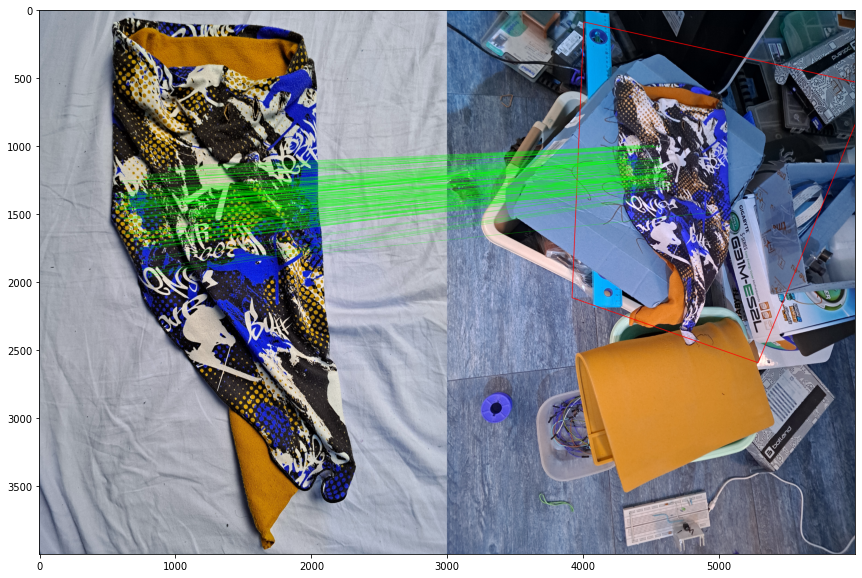

In [56]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize=(20,10))
plt.imshow(img3, 'gray')